Early Spring Data Exploration 
========================

* Frame the problem and look at the big picture
* Get the data



In [2]:
# All of your imports here 
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from IPython.display import display
import pandas as pd
import os

#### **Merging The Data**

In [5]:
csv_files = [
    'early_spring.csv',
    'phil_pred.csv',
    'soil.csv',
    'weather.csv'
]

def process_file(file):
    df = pd.read_csv(file)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
    elif 'day' in df.columns:
        df['day'] = pd.to_datetime(df['day'])
        df.rename(columns={'day': 'date'}, inplace=True)
    elif 'year' in df.columns:
        df['year'] = pd.to_datetime(df['year'], format='%Y')
        df.rename(columns={'year': 'date'}, inplace=True)
    return df

output_file = 'combined_data.csv'
combined_data = None

for file in csv_files:
    df = process_file(file)
    if combined_data is None:
        combined_data = df
    else:
        combined_data = pd.merge(combined_data, df, on='date', how='outer', suffixes=('', f'_{file.split(".")[0]}'))
    print(f"Processed {file}")

combined_data = combined_data.sort_values(by='date')

combined_data.to_csv(output_file, index=False)

print("\nFirst 5 rows of sorted merged data:")
print(combined_data.head())
print("\nShape of sorted merged data:", combined_data.shape)
print("\nColumns in sorted merged data:")
print(combined_data.columns.tolist())
print("\nMerge and sorting completed. Combined data saved to", output_file)


Processed early_spring.csv
Processed phil_pred.csv
Processed soil.csv
Processed weather.csv

First 5 rows of sorted merged data:
        date early_spring prediction  mean_soil_temp  mean_soil_moisture  \
0 1947-01-01        False      False       -3.220000            0.477200   
1 1947-01-02          NaN        NaN       -2.533333            0.498333   
2 1947-01-03          NaN        NaN       -1.733333            0.515000   
3 1947-01-04          NaN        NaN        0.729167            0.496625   
4 1947-01-05          NaN        NaN        0.162500            0.485792   

   min_soil_temp  min_soil_moisture  max_soil_temp  max_soil_moisture  \
0           -4.1              0.475           -1.4              0.480   
1           -3.2              0.478           -1.8              0.518   
2           -2.7              0.504           -0.1              0.519   
3           -0.1              0.489            2.1              0.509   
4           -0.7              0.484            1.

# Frame the Problem and Look at the Big Picture 


1. **Define the objective in business terms:** We want to predict early spring for Groundhog Day (I think right?). We want to be able to estimate if there will be an early spring based on weather and soil data available before April 1st. Being able to predict this accurately can lead to significant financial gains.

2. **How will your solution be used?** It will be used to make a prediction before April 1st each year. The prediction will be based on daily local weather and soil data collected up to that point. This information will be used to make business decisions that can lead to increased profits if the prediction is correct.

3. **What is the current solution?** Currently, there might be traditional methods or less data-driven approaches to predicting early spring. Our solution aims to improve upon these by incorporating more data and using machine learning techniques.

4. **How should you frame this problem?** <mark>This will be a supervised problem where we are predicting whether there will be an early spring or not. We will want this to be a system that can adapt to climate changes over time. Since it's based on weather data, it's unlikely to be gamed or manipulated.</mark> 

5. **How should performance be measured? Is the performance measure aligned with the business objective?** <mark>idk yet</mark>

6. **What would be the minimum performance needed to reach the business objective?** The prediction accuracy should be significantly better than random guessing (50%) to be profitable. Given the profit/loss percentages, an accuracy above 65% would start to be profitable.

7. **What are comparable problems? Can you reuse experience or tools?** <mark>We can use tools and techniques from other binary classification problems in weather prediction or agricultural forecasting. Time series analysis tools will also be valuable given the nature of the data.</mark> 

8. **Is human expertise available?** idk.

9. **How would you solve the problem manually?** <mark>idk yet</mark>

10. **List the assumptions you (or others) have made so far. Verify assumptions if possible.** 
    - The local data collected daily is reliable and consistent over the years.
    - Climate change isn't dramatically altering the patterns year over year.
    - The 5-day period before April 1st is the most critical for prediction.


In [4]:
data = pd.read_csv('combined_data.csv')

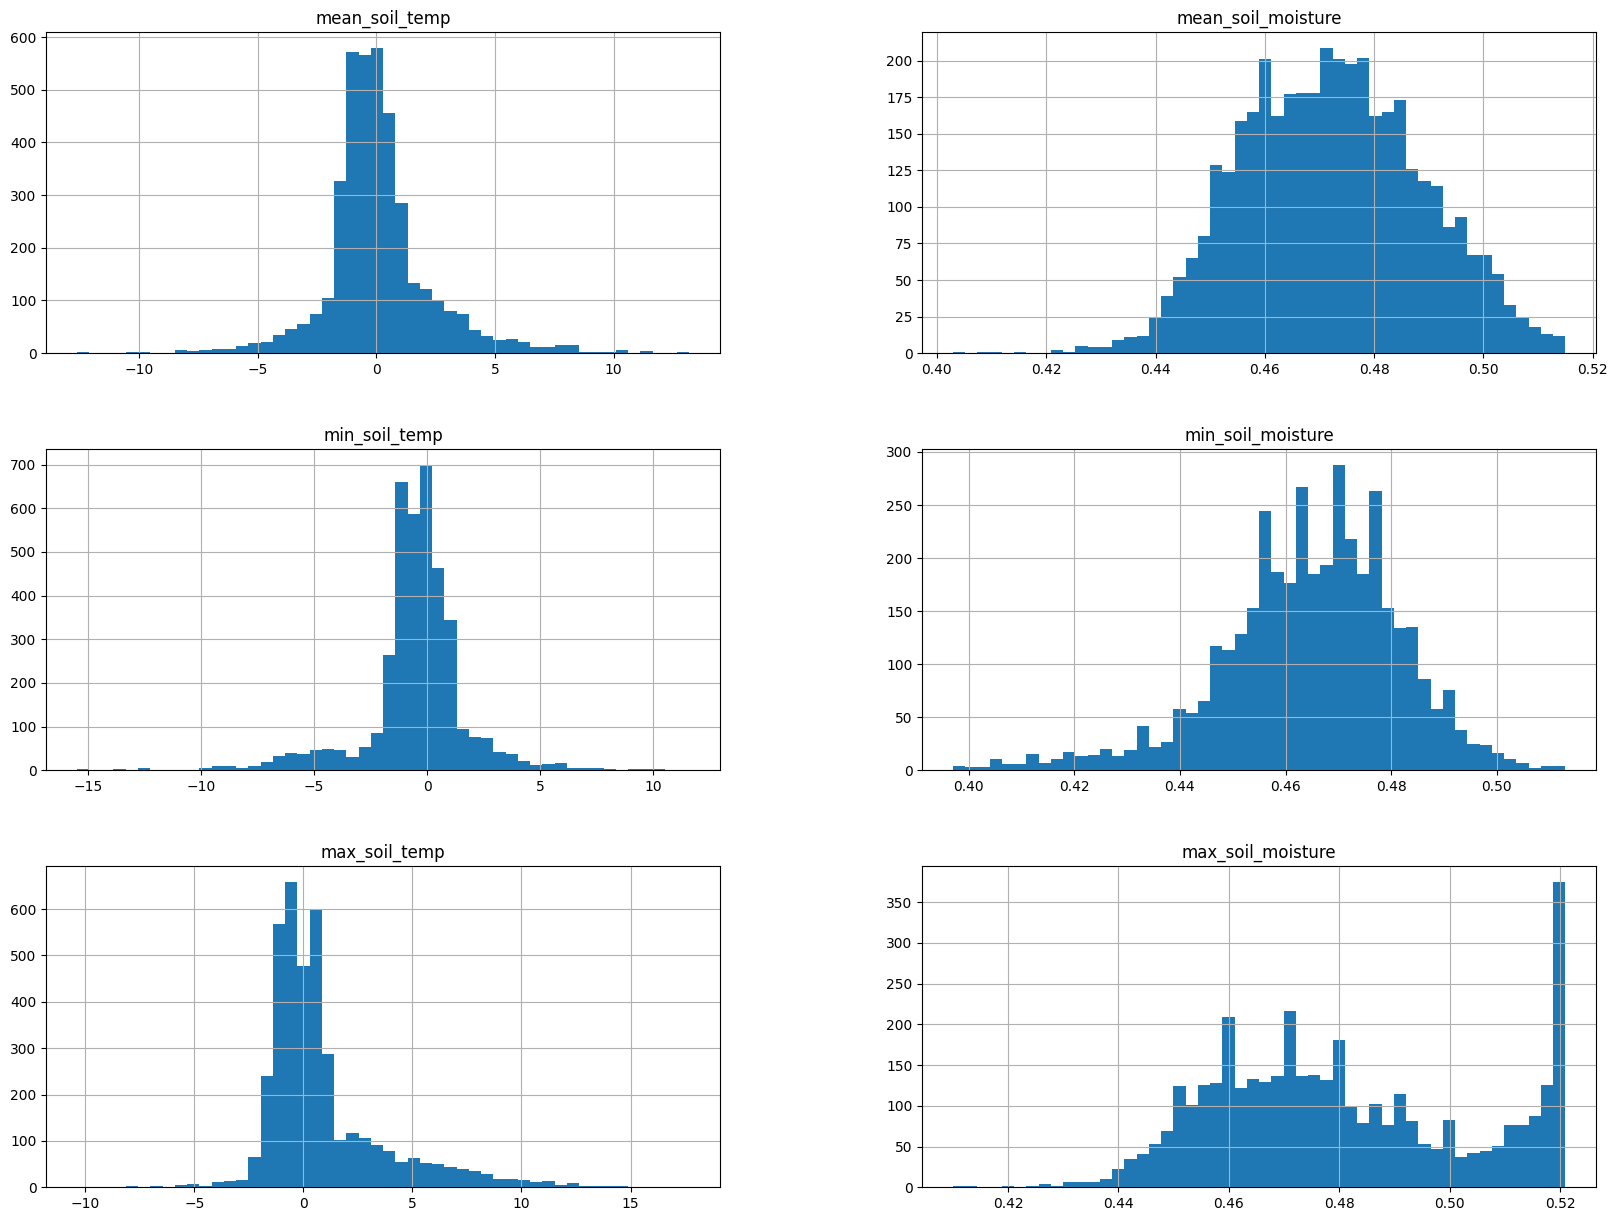

In [6]:
data.hist(bins=50, figsize=(20,15));

In [7]:
def split_data():
    # Split the data into training and testing sets
    train_set = data.sample(frac=0.8, random_state=7)
    test_set = data.drop(train_set.index)
    return train_set, test_set

In [8]:
train_set, test_set = split_data()

In [19]:
for index, row in train_set.iterrows():
    if row["early_spring"] == True:
        print(row["year"])


1977-01-01
1967-01-01
1998-01-01
2023-01-01
1949-01-01
2000-01-01
2016-01-01
1963-01-01
2010-01-01
1986-01-01
1995-01-01
2017-01-01
2021-01-01
2007-01-01
2012-01-01
1997-01-01
2022-01-01
2009-01-01
1961-01-01
1952-01-01
1983-01-01
1987-01-01
2003-01-01
1989-01-01
1955-01-01
2020-01-01
1985-01-01
1976-01-01
2024-01-01
